# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Maria Goretti Risadniati Madsun
- Email: risadniati@gmail.com
- Id Dicoding: icachan47

## Persiapan

### Menyiapkan library yang dibutuhkan

Menyiapkan direktori dan virtual environment

In [47]:
# Membuat direktori project
!mkdir edu_project

# Memindahkan direktori
%cd edu_project

/content/edu_project/edu_project


In [48]:
# Menginstal 'virtualenv'
!pip install virtualenv

In [49]:
# Membuat virtual environment di dalam direktori proyek
!virtualenv env

created virtual environment CPython3.10.12.final.0-64 in 288ms
  creator CPython3Posix(dest=/content/edu_project/edu_project/env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.0, setuptools==69.5.1, wheel==0.43.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [50]:
# Mengaktifkan virtual environment
!source env/bin/activate

In [51]:
# Menginstall library
!pip install numpy pandas scipy matplotlib seaborn sqlalchemy scikit-learn joblib

In [52]:
import numpy as np
import pandas as pd
import sys
import os
import joblib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.utils import shuffle
from google.colab import files
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
# Menggunakan paket dari virtual environment
sys.path.append('/content/edu_project/env/lib/python3.8/site-packages')

In [54]:
# Verifikasi instalasi
print(np.__version__)

1.25.2


### Menyiapkan data yang akan digunakan

In [55]:
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'
main_df = pd.read_csv(url, encoding='windows-1252', delimiter=';')

print(main_df.head(5))

   ï»¿Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122

## Data Understanding

Students' Performance

A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic sucess.

| Column name | Description |
| --- | --- |
|Marital status | The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| Application mode | The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)|
|Application order | The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice) |
|Course | The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)|
|Daytime/evening attendance | Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening |
|Previous qualification| The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle) |
|Previous qualification (grade) | Grade of previous qualification (between 0 and 200) |
| Nacionality | The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian|
|Mother's qualification | The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)|
|Father's qualification | The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |
| Mother's occupation | The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants |
| Father's occupation | The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers |
| Admission grade | Admission grade (between 0 and 200) |
| Displaced | Whether the student is a displaced person. (Categorical) 	1 – yes 0 – no |
| Educational special needs | Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no |
|Debtor | Whether the student is a debtor. (Categorical) 1 – yes 0 – no|
|Tuition fees up to date | Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no|
|Gender | The gender of the student. (Categorical) 1 – male 0 – female |
|Scholarship holder | Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no |
|Age at enrollment | The age of the student at the time of enrollment. (Numerical)|
|International | Whether the student is an international student. (Categorical) 1 – yes 0 – no|
|Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical) |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical) |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical) |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical) |

- Memeriksa apakah terdapat missing value

In [56]:
main_df.isna().sum()

ï»¿Marital_status                               0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Data cukup baik, karena tidak ada kolom yang memiliki missing value

- Memeriksa apakah ada invalid value

In [57]:
print(main_df.dtypes)

ï»¿Marital_status                                 int64
Application_mode                                  int64
Application_order                                 int64
Course                                            int64
Daytime_evening_attendance                        int64
Previous_qualification                            int64
Previous_qualification_grade                    float64
Nacionality                                       int64
Mothers_qualification                             int64
Fathers_qualification                             int64
Mothers_occupation                                int64
Fathers_occupation                                int64
Admission_grade                                 float64
Displaced                                         int64
Educational_special_needs                         int64
Debtor                                            int64
Tuition_fees_up_to_date                           int64
Gender                                          

Data cukup baik, dimana tipe data sesuai dengan deskripsi data

- Memeriksa apakah ada data duplikat

In [58]:
# Memeriksa baris duplikat
baris_duplikat = main_df[main_df.duplicated()]

print('Baris duplikat:')
print(baris_duplikat)

Baris duplikat:
Empty DataFrame
Columns: [ï»¿Marital_status, Application_mode, Application_order, Course, Daytime_evening_attendance, Previous_qualification, Previous_qualification_grade, Nacionality, Mothers_qualification, Fathers_qualification, Mothers_occupation, Fathers_occupation, Admission_grade, Displaced, Educational_special_needs, Debtor, Tuition_fees_up_to_date, Gender, Scholarship_holder, Age_at_enrollment, International, Curricular_units_1st_sem_credited, Curricular_units_1st_sem_enrolled, Curricular_units_1st_sem_evaluations, Curricular_units_1st_sem_approved, Curricular_units_1st_sem_grade, Curricular_units_1st_sem_without_evaluations, Curricular_units_2nd_sem_credited, Curricular_units_2nd_sem_enrolled, Curricular_units_2nd_sem_evaluations, Curricular_units_2nd_sem_approved, Curricular_units_2nd_sem_grade, Curricular_units_2nd_sem_without_evaluations, Unemployment_rate, Inflation_rate, GDP, Status]
Index: []

[0 rows x 37 columns]


Tidak ada baris yang duplikat dalam data, maka data sudah cukup baik, karena memiliki nilai unik.

- Memeriksa apakah ada inaccurate value

In [59]:
main_df.describe()

,ï»¿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Statistik data terlihat normal. Data dapat digunakan untuk proses selanjutnya.

- Exploratory Data Analysis

Melihat sebaran pada kolom Status

In [60]:
main_df['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Terdapat 3 nilai pada kolom status, yaitu Graduate, Dropout dan Enrolled.
Namun, pada proyek ini hanya akan dianalisa status Graduate dan Dropout. Oleh karena itu, status Enrolled akan dihapus

In [61]:
main_df = main_df[main_df['Status'] != 'Enrolled']

Melihat kembali sebaran kolom status setelah menghapus nilai Enrolled

In [62]:
main_df['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Name: count, dtype: int64

Untuk memudahkan pemrosesan data selanjutnya, data pada kolom Status akan diubah menjadi numerik :
- Graduate = 1
- Dropout = 0

In [63]:
# Mengubah nilai 'graduate' menjadi 1 dan 'dropout' menjadi 0
main_df['Status'] = main_df['Status'].map({'Graduate': 1, 'Dropout': 0})
print(main_df['Status'].value_counts)

<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Status, Length: 3630, dtype: int64>


<ipython-input-63-5c76b59a4dd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Status'] = main_df['Status'].map({'Graduate': 1, 'Dropout': 0})


## Data Preparation / Preprocessing

- Memeriksa korelasi

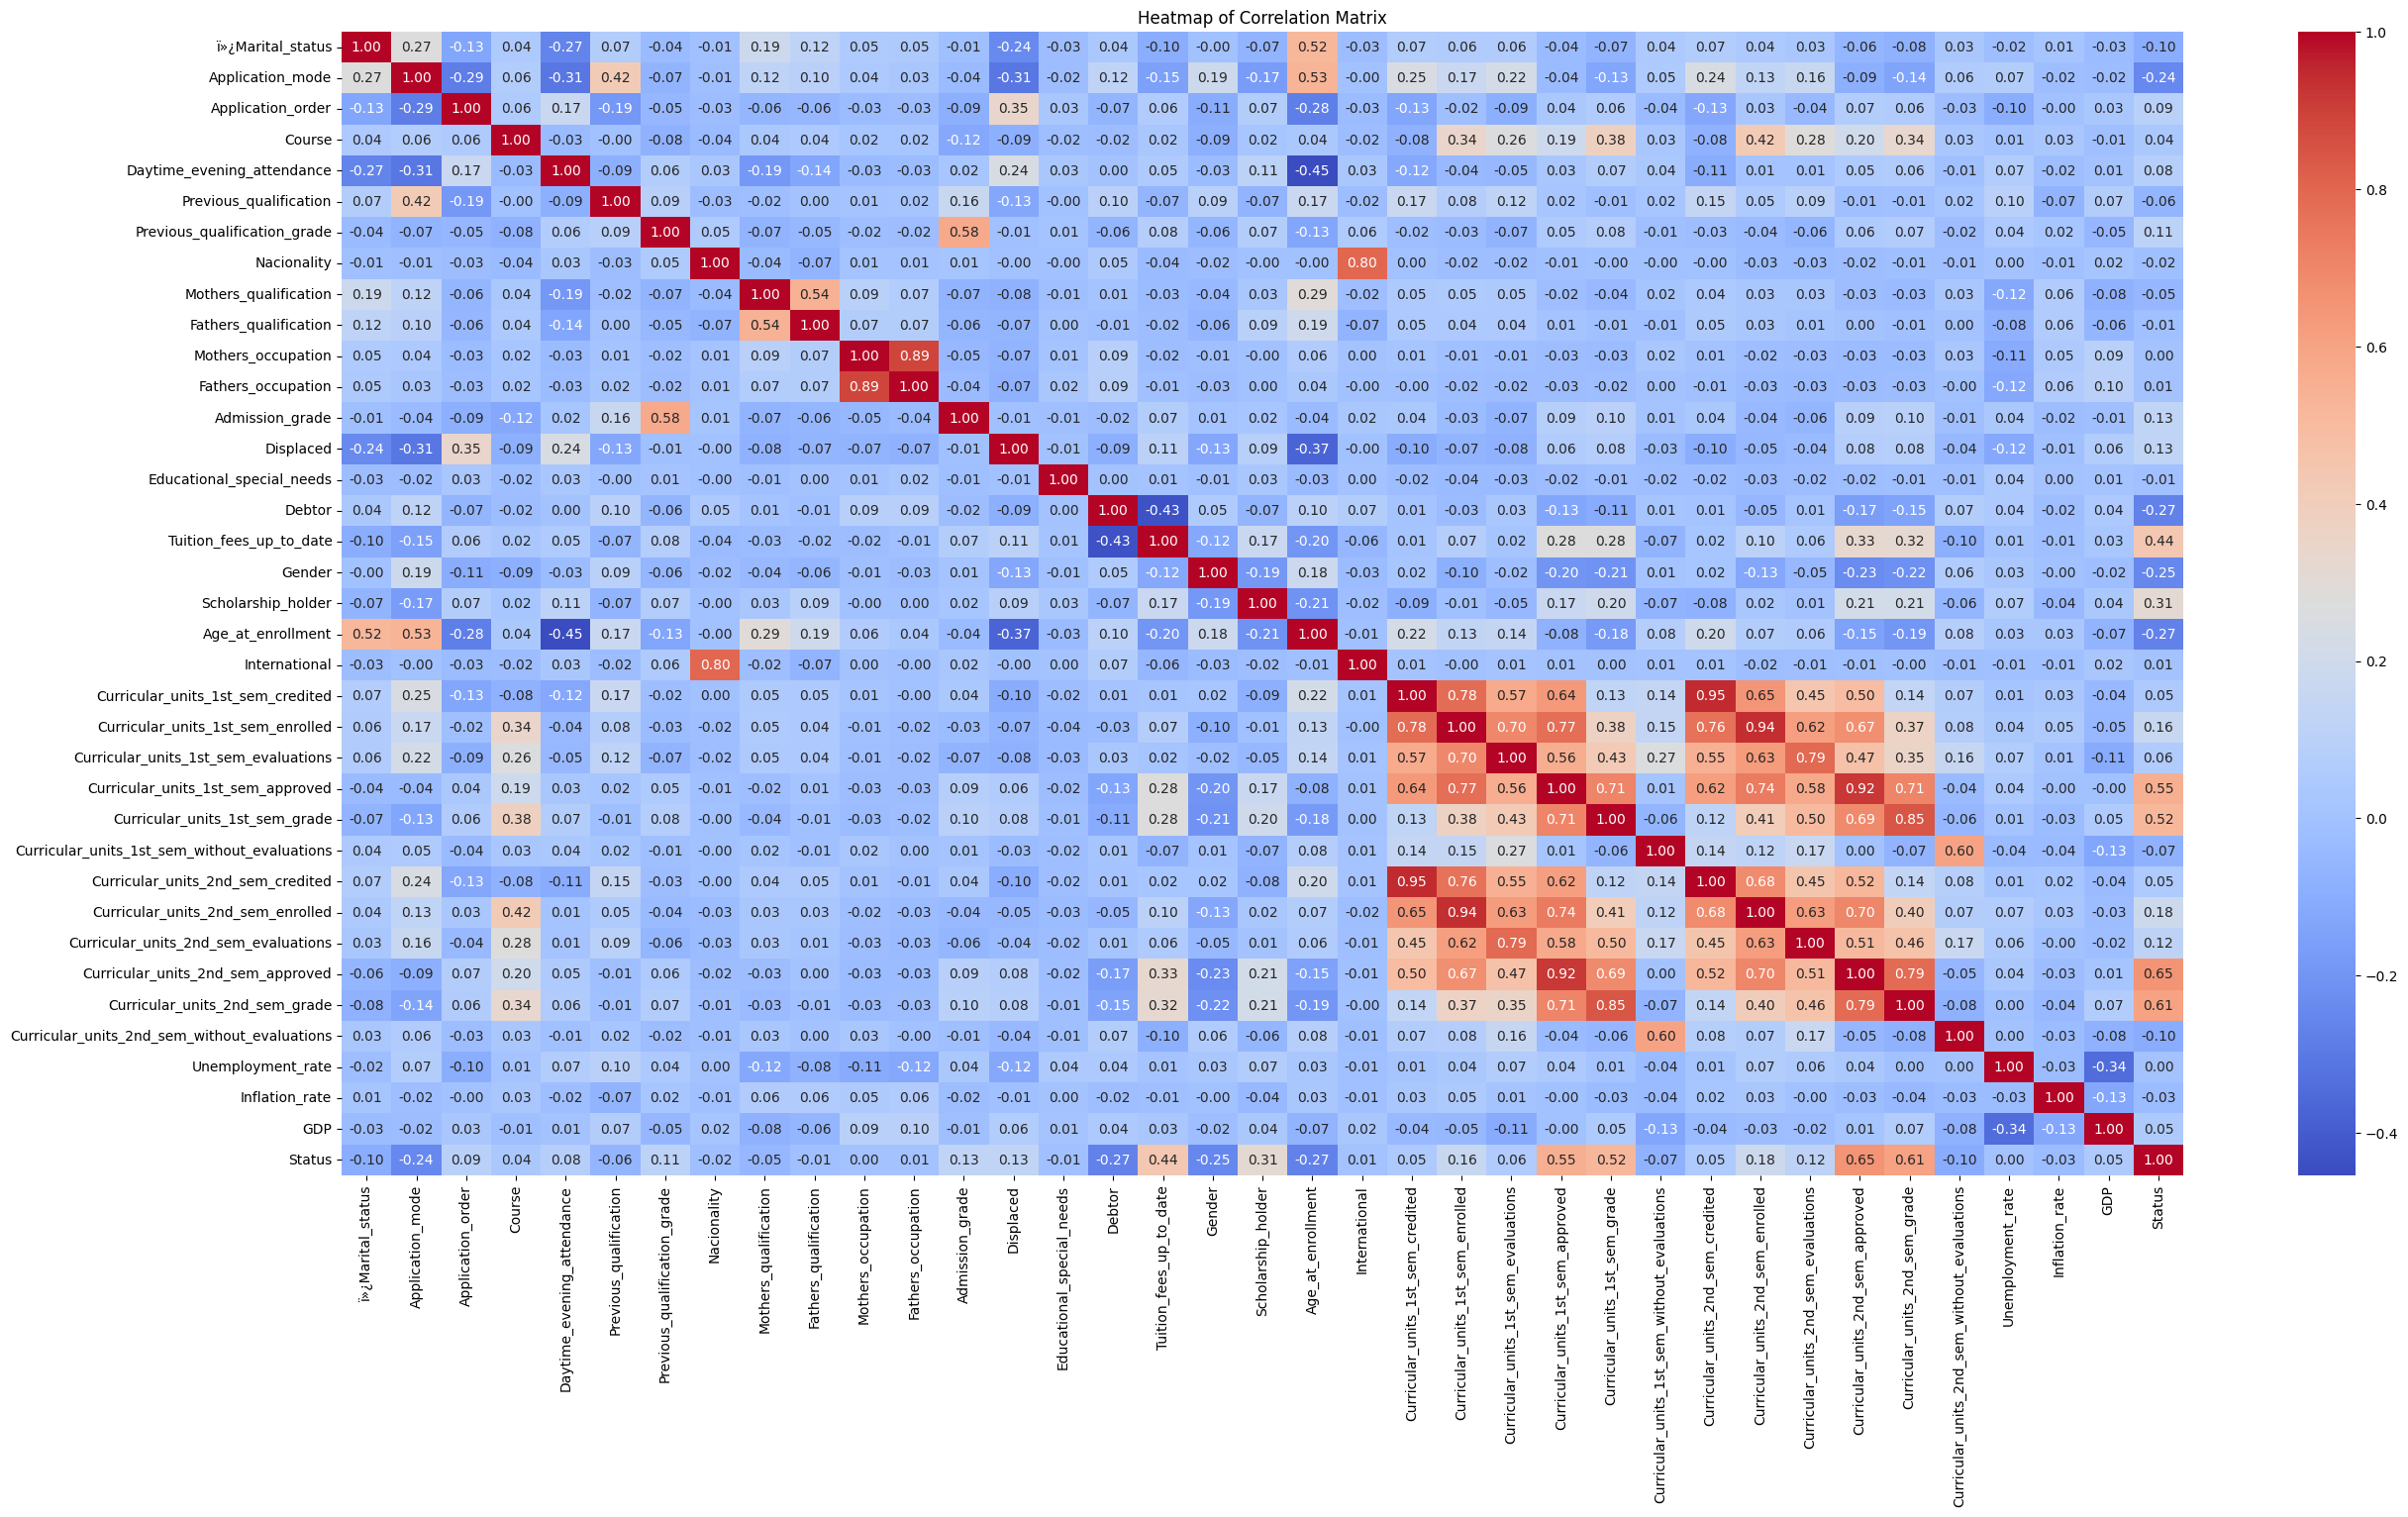

In [64]:
correlation_matrix = main_df.corr()

plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

Heatmap di atas menampilkan hubungan antaran semua kolom. Selanjutnya, mari kita lihat heatmap yang berkorelasi dengan kolom status

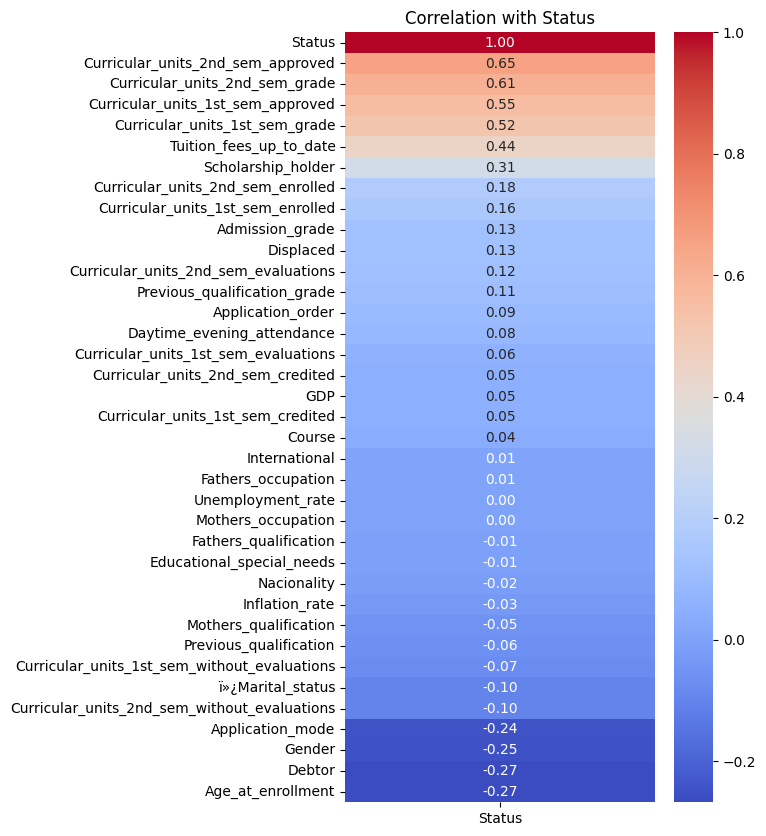

In [65]:
correlation_matrix = main_df.corr()
status_correlation = correlation_matrix[['Status']].sort_values(by='Status', ascending=False)

plt.figure(figsize=(5, 10))
sns.heatmap(status_correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation with Status')
plt.show()

Berdasarkan korelasi dengan kolom Status, maka untuk pre-processing dapat digunakan kolom :
- Curricular_units_2nd_sem_approved
- Curricular_units_2nd_sem_grade
- Curricular_units_1st_sem_approved
- Curricullar_units_1st_sem_grade
- Tuition_fees_up_to_date

Hal ini karena kolom di atas berkaitan erat dengan kolom Status, atau dengan kata lain kelima fitur di atas mempengaruhi dropout atau lulusnya mahasiswa.

In [66]:
selected_features = [
  'Curricular_units_2nd_sem_approved',
  'Curricular_units_2nd_sem_grade',
  'Curricular_units_1st_sem_approved',
  'Curricular_units_1st_sem_grade',
  'Tuition_fees_up_to_date'
]

new_main_df = main_df[selected_features + ['Status']]
new_main_df.head(5)

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Status
0,0,0.000000,0,0.000000,1,0
1,6,13.666667,6,14.000000,0,1
2,0,0.000000,0,0.000000,0,0
3,5,12.400000,6,13.428571,1,1
4,6,13.000000,5,12.333333,1,1


Train-Test Split

In [67]:
# Membagi data menjadi fitur dan target
X = new_main_df.drop('Status', axis=1)
y = new_main_df['Status']

In [68]:
# Memisahkan data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

Selanjutnya, dilihat banyaknya data untuk 'dropout' dan 'graduate'. Apabila data belum seimbang, maka akan dilakukan oversampling terlebih dahulu

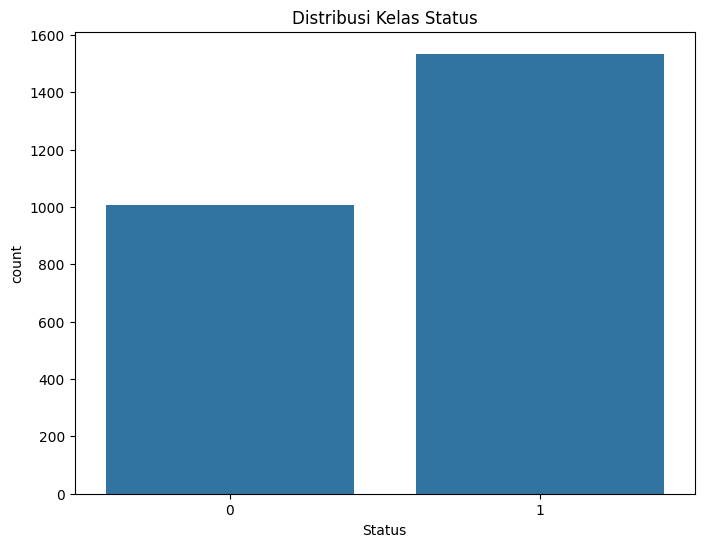

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Distribusi Kelas Status')
plt.show()

Data latih didominasi kategori status = 1, ini menunjukkan adanya imbalance data yang berpotensi menghasilkan bias dan membuat model cenderung memprediksi kelas dominan. Untuk mengatasi hal tersebut, maka digunakan teknik oversampling, untuk memperbanyak data secara acak dari kelas minoritas.

In [70]:
df_majority = X_train[y_train == 1]
df_minority = X_train[y_train == 0]
y_majority = y_train[y_train == 1]
y_minority = y_train[y_train == 0]

# Oversampling
df_minority_oversampled, y_minority_oversampled = resample(df_minority, y_minority,
                                                           replace=True,
                                                           n_samples=len(df_majority),
                                                           random_state=42)

# Menggabungkan data mayoritas dan data minoritas yang sudah di-oversampling
X_train = pd.concat([df_majority, df_minority_oversampled])
y_train = pd.concat([y_majority, y_minority_oversampled])

X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [71]:
if not isinstance(y_train, pd.Series):
  if not y_train.empty:
    y_train = pd.Series(y_train.values.flatten())

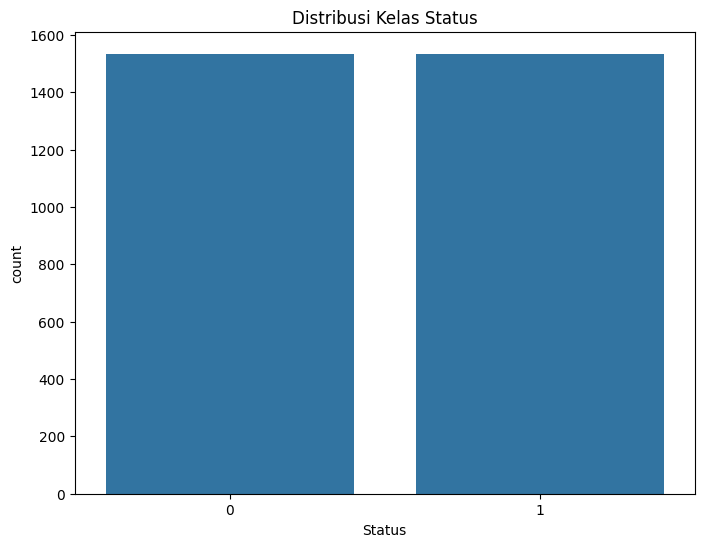

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Distribusi Kelas Status')
plt.show()

Melalui grafik di atas, maka dapat diketahui bahwa distribusi kelas sudah seimbang. Selanjutnya, akan dibuat fungsi helper untuk scaling

In [73]:
# Definisi fungsi helper untuk scaling
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            df[feature] = scaler.fit_transform(df[[feature]])
            df_test[feature] = scaler.transform(df_test[[feature]])

            # Memastikan direktori 'model' ada
            if not os.path.exists("model"):
                os.makedirs("model")

            joblib.dump(scaler, f"model/scaler_{feature}.joblib")
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            df[feature] = scaler.fit_transform(df[[feature]])

            # Memastikan direktori 'model' ada
            if not os.path.exists("model"):
                os.makedirs("model")

            joblib.dump(scaler, f"model/scaler_{feature}.joblib")
        return df

In [74]:
# Melakukan scaling pada fitur-fitur yang dipilih
X_train_scaled, X_test_scaled = scaling(selected_features, X_train, X_test)

print(X_train_scaled.head())
print(X_test_scaled.head())

      Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
3264                               0.05                        0.621739   
1610                               0.10                        0.706522   
1529                               0.35                        0.640311   
459                                0.30                        0.753623   
1627                               0.20                        0.621739   

      Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
3264                           0.192308                        0.656954   
1610                           0.115385                        0.565121   
1529                           0.269231                        0.600189   
459                            0.230769                        0.662252   
1627                           0.153846                        0.662252   

      Tuition_fees_up_to_date  
3264                      1.0  
1610                      1.0  
15

In [75]:
# Menampilkan shape dari DataFrame asli dan hasil split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3068, 5)
Shape of X_test: (1089, 5)
Shape of y_train: (3068,)
Shape of y_test: (1089,)


## Modeling

- Decision Tree

In [76]:
# Inisialisasi parameter grid
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

# Inisialisasi model Decision Tree
tree_model = DecisionTreeClassifier(random_state=123)

# Inisialisasi GridSearchCV
CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Melatih model dengan data latih yang telah di-scaling
CV_tree.fit(X_train_scaled, y_train)

# Menampilkan hyperparameter terbaik
print("Best Parameters:", CV_tree.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [77]:
# Menggunakan parameter terbaik dari GridSearchCV
best_params = {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}

# Inisialisasi Decision Tree dengan parameter terbaik
tree_model = DecisionTreeClassifier(**best_params, random_state=123)

# Melatih model dengan data latih yang telah di-preprocessing
tree_model.fit(X_train_scaled, y_train)

# Menyimpan model
joblib.dump(tree_model, "model/best_tree_model.joblib")

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


['model/best_tree_model.joblib']

- Random Forest

In [82]:
# Inisialisasi RandomForestClassifier dengan GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # jumlah pohon dalam hutan
    'max_depth': [None, 10, 20, 30],   # kedalaman maksimum setiap pohon
    'min_samples_split': [2, 5, 10],   # jumlah sampel minimum yang diperlukan untuk membagi simpul dalam pohon
    'min_samples_leaf': [1, 2, 4]      # jumlah sampel minimum yang diperlukan untuk menjadi daun pada pohon
}

rf_model = RandomForestClassifier(random_state=123)
CV_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Melatih model dengan data latih yang telah di-preprocessing
CV_rf.fit(X_train_scaled, y_train)

# Menampilkan hyperparameter terbaik
print("Best Parameters:", CV_rf.best_params_)

# Gunakan parameter terbaik untuk membuat model
best_rf_model = RandomForestClassifier(**CV_rf.best_params_, random_state=123)

# Latih model dengan data latih yang telah di-preprocessing
best_rf_model.fit(X_train_scaled, y_train)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=123)

In [83]:
# Menyimpan model
joblib.dump(best_rf_model, "model/best_rf_model.joblib")

['model/best_rf_model.joblib']

- Gradien Boosting

In [84]:
# Inisialisasi GradientBoostingClassifier dengan GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],    # jumlah iterasi boosting
    'learning_rate': [0.1, 0.01, 0.001], # laju pembelajaran
    'max_depth': [3, 5, 7]               # kedalaman maksimum setiap pohon
}

gb_model = GradientBoostingClassifier(random_state=123)
CV_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Melatih model dengan data latih yang telah di-preprocessing
CV_gb.fit(X_train_scaled, y_train)

# Menampilkan hyperparameter terbaik
print("Best Parameters:", CV_gb.best_params_)

# Gunakan parameter terbaik untuk membuat model
best_gb_model = GradientBoostingClassifier(**CV_gb.best_params_, random_state=123)

# Latih model dengan data latih yang telah di-preprocessing
best_gb_model.fit(X_train_scaled, y_train)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


GradientBoostingClassifier(max_depth=5, n_estimators=300, random_state=123)

In [85]:
# Menyimpan model
joblib.dump(best_gb_model, "model/best_gb_model.joblib")

['model/best_gb_model.joblib']

## Evaluation

Evaluation for Decision Tree Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       414
           1       0.88      0.92      0.90       675

    accuracy                           0.87      1089
   macro avg       0.87      0.85      0.86      1089
weighted avg       0.87      0.87      0.87      1089

Confusion Matrix:
[[328  86]
 [ 56 619]]


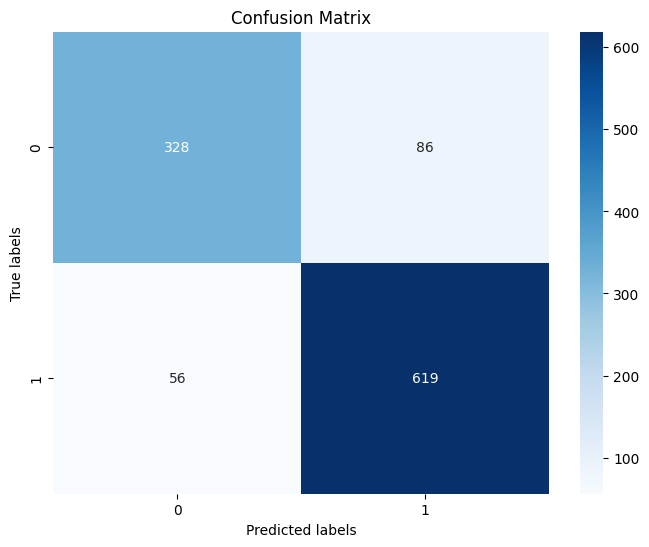

Evaluation for Random Forest Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       414
           1       0.88      0.92      0.90       675

    accuracy                           0.88      1089
   macro avg       0.87      0.86      0.87      1089
weighted avg       0.88      0.88      0.88      1089

Confusion Matrix:
[[332  82]
 [ 53 622]]


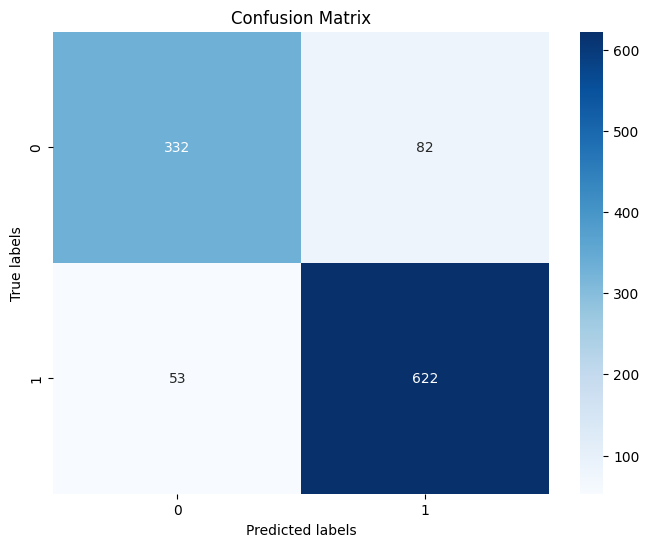

Evaluation for Gradient Boosting Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       414
           1       0.88      0.92      0.90       675

    accuracy                           0.88      1089
   macro avg       0.87      0.86      0.87      1089
weighted avg       0.87      0.88      0.87      1089

Confusion Matrix:
[[332  82]
 [ 54 621]]


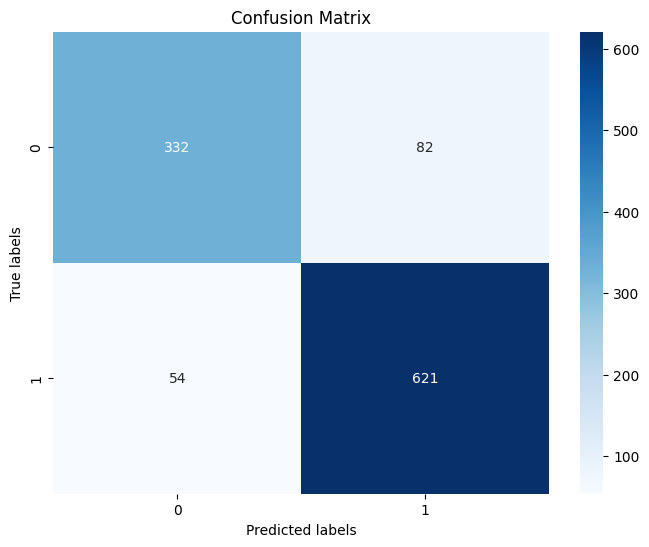

In [86]:
def evaluate_model(model, X_test, y_test):
    '''Evaluates the model and displays the classification report and confusion matrix.'''
    y_pred = model.predict(X_test)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    print("Confusion Matrix:")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print(cnf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluasi model Decision Tree
print("Evaluation for Decision Tree Model:")
evaluate_model(tree_model, X_test_scaled, y_test)

# Evaluasi model Random Forest
print("Evaluation for Random Forest Model:")
evaluate_model(best_rf_model, X_test_scaled, y_test)

# Evaluasi model Gradient Boosting
print("Evaluation for Gradient Boosting Model:")
evaluate_model(best_gb_model, X_test_scaled, y_test)

Analisis :

1. Precision, Recall, dan F1-Score:
- Model Random Forest dan Gradient Boosting memiliki nilai precision, recall dan F1-Score yang lebih tinggi dari model Decision Tree untuk kelas 'dropout' atau 1. Ini menunjukkan bahwa kedua model cukup baik untuk memprediksi siswa yang dropout.

2. Accuracy
- Akurasi dari model Random Forest dan Gradient Boosting memiliki akurasi 0.89, nilai ini lebih tinggi dari akurasi Decision Tree (0.87)

3. Confusion Matrix
- Random Forest dan Gradient Boosting memiliki jumlah prediksi benar yang lebih tinggi dibandingkan dengan Decision Tree (dapat dilihat dari TP + TN)
- Jumlah False Negatives (FN) dari Random Forest merupakan yang terendah. Ini menunjukkan bahwa lebih sedikit kasus dropout yang salah terprediksi.


Kesimpulan :

Berdasarkan evaluasi di atas, model Random Forest dan Gradient Boosting memiliki performa yang sangat mirip, dengan keunggulan Random Forest dalam nilai precision dan jumlah False Negatives. Oleh karena itu, akan digunakan model Random Forest untuk memprediksi dropout.
